In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import importlib.util
import sys

spec = importlib.util.spec_from_file_location("funcoes","../lib/funcoes.py")
funcoes = importlib.util.module_from_spec(spec)
sys.modules["funcoes"] = funcoes
spec.loader.exec_module(funcoes)

PATH_IMG = "../IMAGENS/"

PATH = os.getcwd()

print(os.getcwd())
print(os.listdir(PATH_IMG))
print(cv.__version__)

img_original = cv.imread(PATH_IMG + os.listdir(PATH_IMG)[0])
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)

/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/06_DETECCAO_CANNY
['circulo.png', 'Lenna.png', 'carrinho.jpg', 'Einstein.png', 'everest.jpg', 'fabio.png']
4.10.0


# Detecção de bordas com Canny

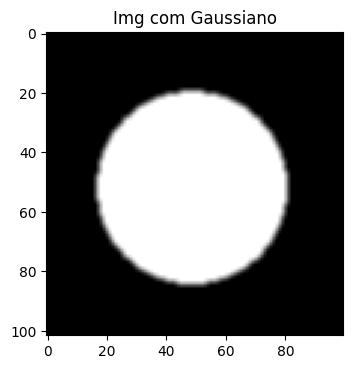

In [25]:
kernel_gaussian = funcoes.gaussian_kernel(3,1,1)

img_gaussian = funcoes.filtro_espacial(img_gray, kernel_gaussian)

figure(figsize=(funcoes.cm_to_inch(10), funcoes.cm_to_inch(10)))
plt.imshow(img_gaussian, cmap="gray")
plt.title("Img com Gaussiano")

plt.show()

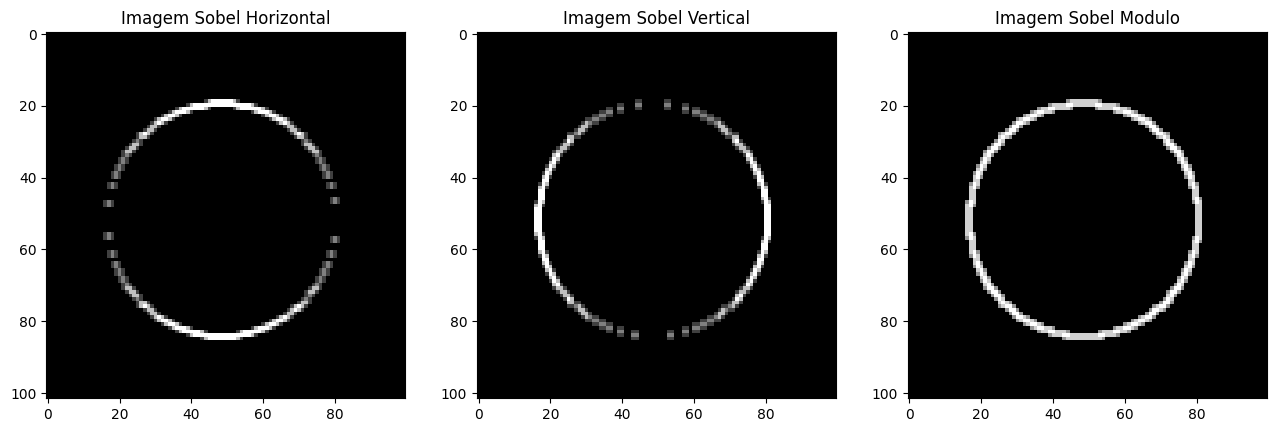

In [26]:
kernel_sobel_horizontal = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

kernel_sobel_vertical = kernel_sobel_horizontal.transpose()

img_sobel_horizontal = np.abs(funcoes.filtro_espacial(img_gray, kernel_sobel_horizontal))
img_sobel_vertical = np.abs(funcoes.filtro_espacial(img_gray, kernel_sobel_vertical))

img_sobel_soma = np.sqrt(img_sobel_horizontal + img_sobel_vertical)

plt.figure(figsize=(funcoes.cm_to_inch(40), funcoes.cm_to_inch(40)))

plt.subplot(131)
plt.title("Imagem Sobel Horizontal")
plt.imshow(img_sobel_horizontal, cmap='gray')

plt.subplot(132)
plt.title("Imagem Sobel Vertical")
plt.imshow(img_sobel_vertical, cmap='gray')

plt.subplot(133)
plt.title("Imagem Sobel Modulo")
plt.imshow(img_sobel_soma, cmap='gray')

plt.show()

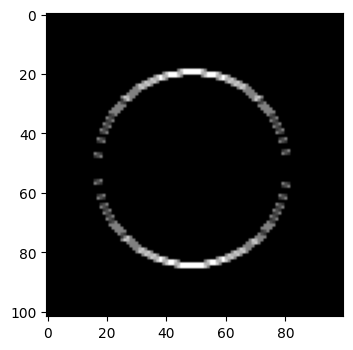

In [27]:
img_gradiente = np.arctan2(img_sobel_horizontal, img_sobel_vertical)
img_gradiente = np.rad2deg(img_gradiente)

plt.figure(figsize=(funcoes.cm_to_inch(10), funcoes.cm_to_inch(10)))
plt.imshow(img_gradiente, cmap='gray')

plt.show()

In [28]:
del img_gaussian, img_sobel_horizontal, img_sobel_vertical
del img_sobel_soma, img_gradiente

## Circulo Xibata

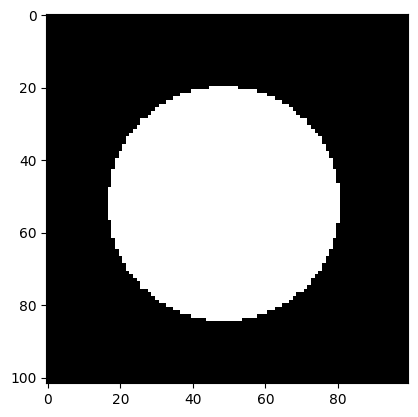

In [29]:
img_circulo = cv.imread(PATH_IMG+os.listdir(PATH_IMG)[0])
img_circulo = cv.cvtColor(img_circulo, cv.COLOR_BGR2GRAY)

plt.imshow(img_circulo, cmap="gray")
plt.show()

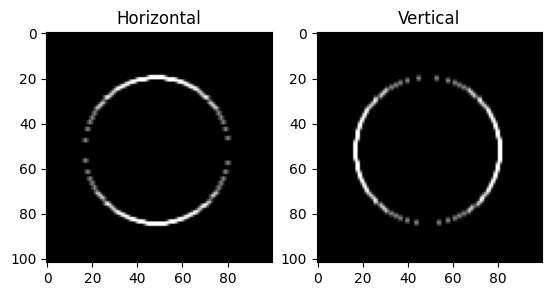

In [30]:
# img_circ_gaussian = funcoes.filtro_espacial(img_circulo,kernel_gaussian)
img_circ_gaussian = np.copy(img_circulo)

img_circ_sobel_horizontal = np.zeros_like(img_circulo, dtype=np.float16)
img_circ_sobel_vertical = np.zeros_like(img_circulo, dtype=np.float16)

img_circ_sobel_horizontal = np.abs(funcoes.filtro_espacial(img_circ_gaussian, kernel_sobel_horizontal))
img_circ_sobel_vertical = np.abs(funcoes.filtro_espacial(img_circ_gaussian, kernel_sobel_vertical))

plt.subplot(121)
plt.imshow(img_circ_sobel_horizontal, cmap="gray")
plt.title("Horizontal")

plt.subplot(122)
plt.imshow(img_circ_sobel_vertical, cmap="gray")
plt.title("Vertical")

plt.show()

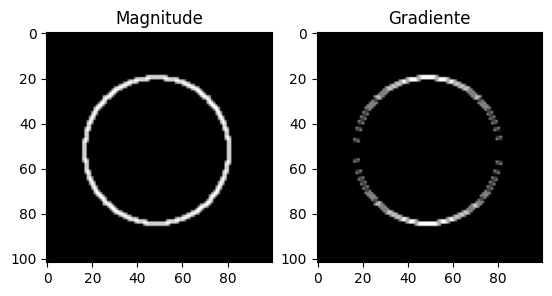

In [31]:
img_circ_magnitude = np.zeros_like(img_circulo, dtype=np.float32)
img_circ_gradiente = np.zeros_like(img_circulo, dtype=np.float32)

img_circ_magnitude = np.sqrt(img_circ_sobel_horizontal + img_circ_sobel_vertical)
img_circ_gradiente = np.arctan2(img_circ_sobel_horizontal, img_circ_sobel_vertical)

plt.subplot(121)
plt.imshow(img_circ_magnitude, cmap="gray")
plt.title("Magnitude")

plt.subplot(122)
plt.imshow(img_circ_gradiente, cmap="gray")
plt.title("Gradiente")

plt.show()

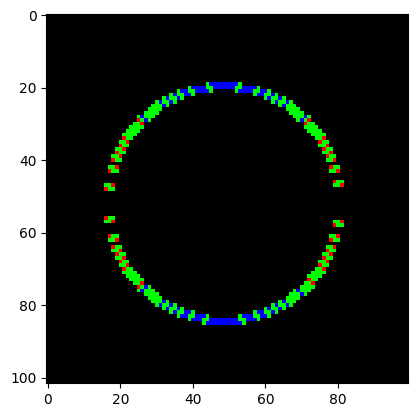

In [32]:
img_circ_B = np.zeros_like(img_circulo)
img_circ_G = np.zeros_like(img_circulo)
img_circ_R = np.zeros_like(img_circulo)

img_circ_gradiente = np.rad2deg(img_circ_gradiente)

angulo_45 = [22.5, 67.5]
angulo_90 = [67.5, 112.5]

for i in range(0, img_circ_gradiente.shape[0]):
    for j in range(0, img_circ_gradiente.shape[1]):
        if img_circ_gradiente[i,j] > angulo_45[0] and img_circ_gradiente[i,j] < angulo_45[1]:
            img_circ_G[i,j] = 255
        if img_circ_gradiente[i,j] > angulo_90[0] and img_circ_gradiente[i,j] < angulo_90[1]:
            img_circ_B[i,j] = 255
        if (img_circ_gradiente[i,j] > 157.5 and img_circ_gradiente[i,j] < 180) or \
        (img_circ_gradiente[i,j] > 0 and img_circ_gradiente[i,j] < 22.5):
            img_circ_R[i,j] = 255

img_circ_BGR = np.zeros((img_circulo.shape[0],img_circulo.shape[1],3), dtype=np.uint8)
img_circ_BGR[:,:,0] = img_circ_B
img_circ_BGR[:,:,1] = img_circ_G
img_circ_BGR[:,:,2] = img_circ_R


plt.imshow(cv.cvtColor(img_circ_BGR, cv.COLOR_BGR2RGB))
plt.show()